# Intersection network statistics

This (incomplete) notebook attempts to output OSMnx stats from a series of locations stored in a dataframe. It has not been tested, but the logic is in place.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import osmnx

## Create a dataframe of random Lat/Lon's in LA

In [2]:
# create 10 random lat's and lon's in Los Angeles|
lats = np.random.uniform(33.75, 34.2, size=(10))
lons = np.random.uniform(-118.4,-118.1, size=(10))

In [3]:
# put them in a dict
d = {'lat':lats,'lon':lons}

In [4]:
# put them in a dataframe
df = pd.DataFrame(d)
df

,lat,lon
0,34.017084,-118.213732
1,34.095780,-118.215597
2,33.793265,-118.309883
3,34.165593,-118.208401
4,33.847799,-118.389049
5,34.081500,-118.192888
6,33.872338,-118.215783
7,34.163553,-118.304098
8,33.833539,-118.310123
9,33.845382,-118.106288


## Add columns for OSMnx stats you want

In [5]:
# add columns to df for metrics that you want to capture. For example:
df['street_length_avg']=0
df['nodes']=0
df['edges']=0
df['circuity_avg']=0


OSMnx References for this function:

- [graph from point](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from_place#osmnx.graph.graph_from_point)
- [Basic stats](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=simple%20stats#osmnx.stats.basic_stats)

## Create a function that brings in OSM data for each random point

In [9]:
# create a function 
def analyze_intersection(lat,lon):
    # call osmnx with a lat/lon pair
    # you want to use osmnx.graph.graph_from_point
    G = osmnx.graph.graph_from_point((lat,lon),dist=500)
    
    # draw the map
    fig, ax = osmnx.plot_graph(G)

    # call the function that outputs the stats
    stats=osmnx.stats.basic_stats(G)

    # return observations as a dictionary
    d = dict()
    d['street_length_avg']=stats['street_length_avg']
    d['nodes']=stats['n']
    d['edges']=stats['m']
    d['circuity_avg']=stats['circuity_avg']
    
    print(d)
    
    return d
    

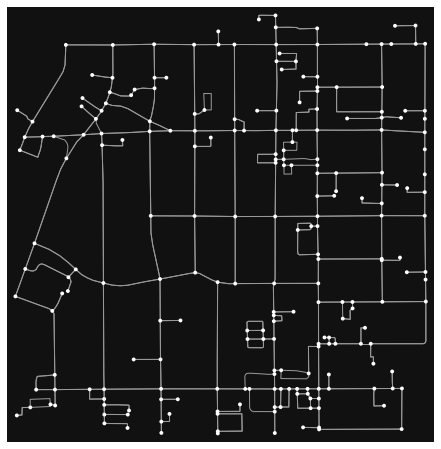

{'street_length_avg': 61.42668106312291, 'nodes': 230, 'edges': 583, 'circuity_avg': 1.0698564789798497}


{'street_length_avg': 61.42668106312291,
 'nodes': 230,
 'edges': 583,
 'circuity_avg': 1.0698564789798497}

In [10]:
# test the function with a random lat/lon pair
analyze_intersection(34.050705, -118.311598)

## Loop through each row in the dataframe and calculate stats

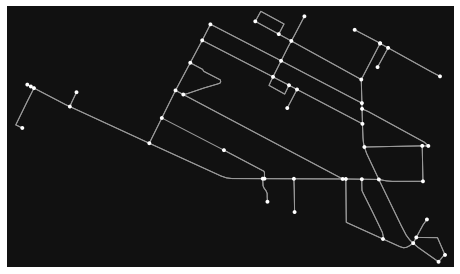

{'street_length_avg': 91.06983076923078, 'nodes': 52, 'edges': 129, 'circuity_avg': 1.0515362566211042}


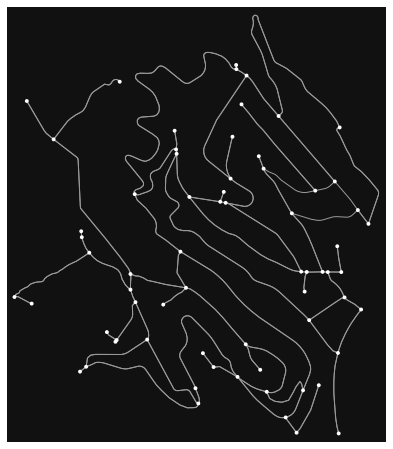

{'street_length_avg': 157.91264935064933, 'nodes': 67, 'edges': 150, 'circuity_avg': 1.203818712886161}


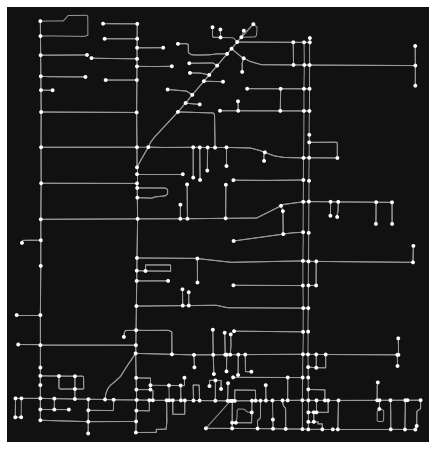

{'street_length_avg': 54.885355932203396, 'nodes': 283, 'edges': 658, 'circuity_avg': 1.0721941161916428}


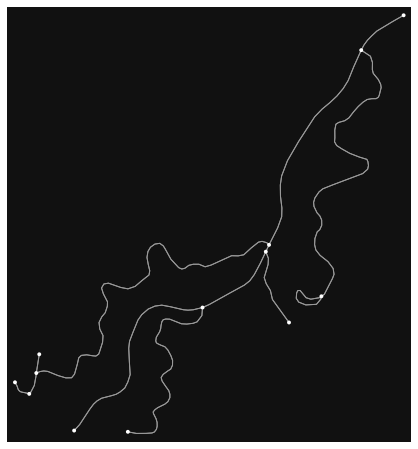

{'street_length_avg': 304.94330769230766, 'nodes': 13, 'edges': 26, 'circuity_avg': 1.3012835439561228}


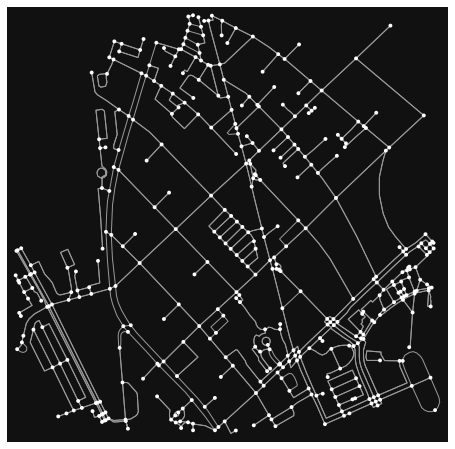

{'street_length_avg': 45.604373001776146, 'nodes': 409, 'edges': 1075, 'circuity_avg': 1.0793199126564628}


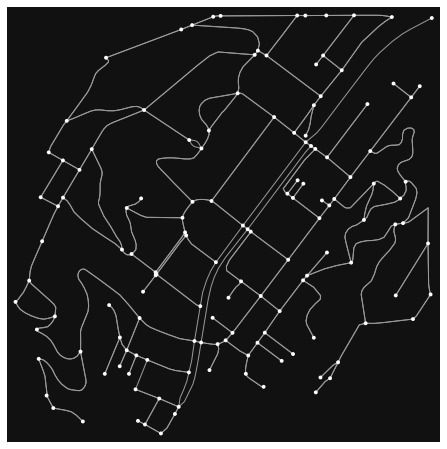

{'street_length_avg': 90.55710465116279, 'nodes': 137, 'edges': 331, 'circuity_avg': 1.0825118672682315}


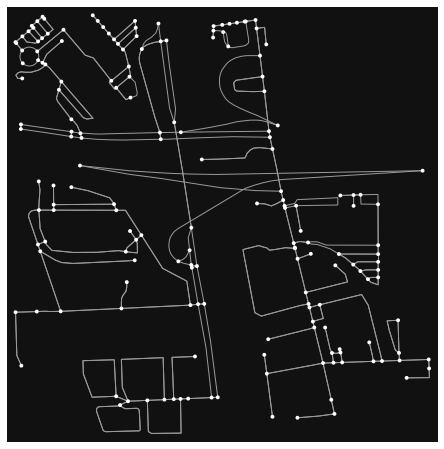

{'street_length_avg': 78.15085067873305, 'nodes': 175, 'edges': 396, 'circuity_avg': 1.1820943393230883}


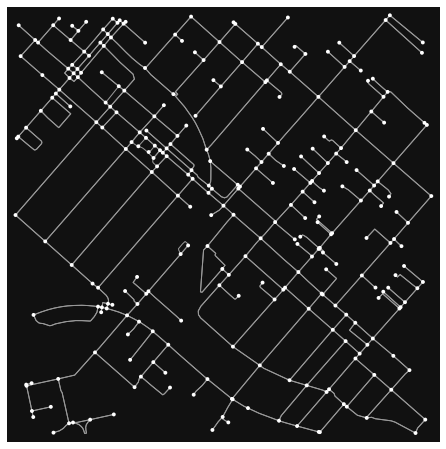

{'street_length_avg': 55.39547777777776, 'nodes': 289, 'edges': 712, 'circuity_avg': 1.0417195264755867}


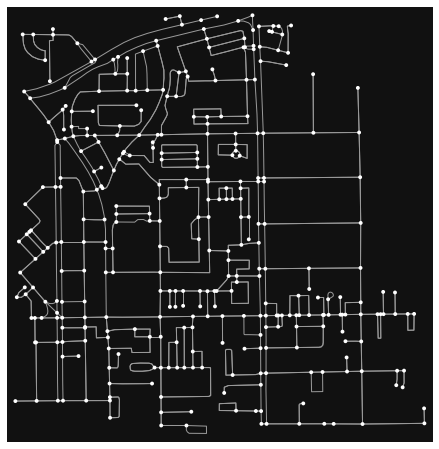

{'street_length_avg': 54.36326304801669, 'nodes': 344, 'edges': 857, 'circuity_avg': 1.109304382524402}


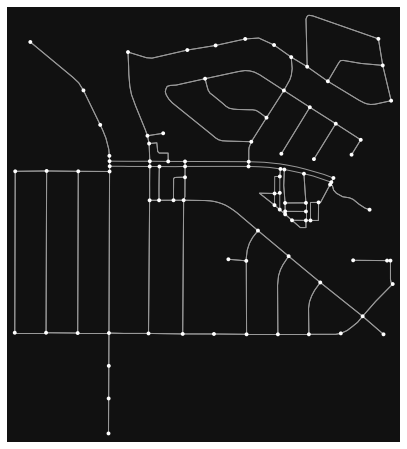

{'street_length_avg': 94.04586290322578, 'nodes': 93, 'edges': 231, 'circuity_avg': 1.052749024554873}


In [11]:
# loop through the dataframe and analyze
for index, row in df.iterrows():
    # call the function
    this_data = analyze_intersection(row.lat,row.lon)
    
    # add data to the column you created
    df.loc[index, 'street_length_avg'] = this_data['street_length_avg']
    df.loc[index, 'nodes'] = this_data['nodes']
    df.loc[index, 'edges'] = this_data['edges']
    df.loc[index, 'circuity_avg'] = this_data['circuity_avg']
                

In [12]:
df

,lat,lon,street_length_avg,nodes,edges,circuity_avg
0,34.017084,-118.213732,91.069831,52,129,1.051536
1,34.095780,-118.215597,157.912649,67,150,1.203819
2,33.793265,-118.309883,54.885356,283,658,1.072194
3,34.165593,-118.208401,304.943308,13,26,1.301284
4,33.847799,-118.389049,45.604373,409,1075,1.079320
5,34.081500,-118.192888,90.557105,137,331,1.082512
6,33.872338,-118.215783,78.150851,175,396,1.182094
7,34.163553,-118.304098,55.395478,289,712,1.041720
8,33.833539,-118.310123,54.363263,344,857,1.109304
9,33.845382,-118.106288,94.045863,93,231,1.052749
